LaTeX Markdown:

# Notebook Imports and Packages

In [111]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # colour map!

%matplotlib inline

# Example 1 - A simple cost function

# $$f(x) = x^2 + x + 1$$

Generating data with numpy:

In [72]:
 def f(x):
        return x**2 + x + 1

In [73]:
# Make data:
x_1 = np.linspace(start=-3, stop=3, num=500)

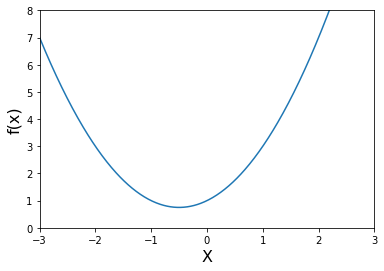

In [74]:
# Plot:
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

# Slope & Derivatives:
Challenge: create a python function for the derivative of $f(x)$ called df(x)

In [75]:
def df(x):
    return 2*x + 1

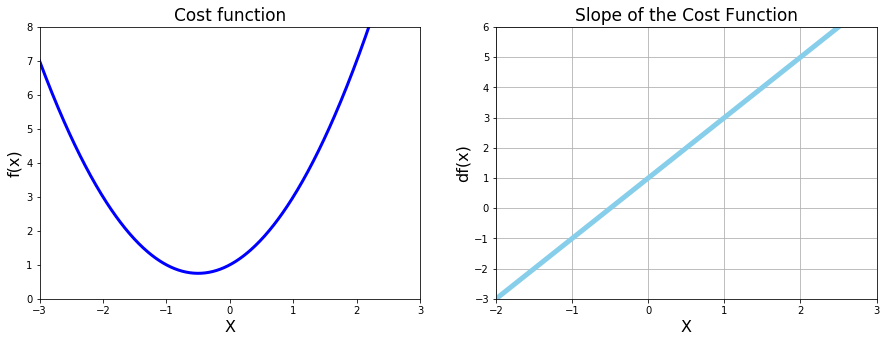

In [76]:
# Plot function and derivative side-by-side:
plt.figure(figsize=[15,5])

# Chart 1: The Cost Function:
plt.subplot(1, 2, 1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# Chart 2: Derivative:
plt.subplot(1,2,2)

plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)


plt.show()

# Python Loops & Gradient Descent:

Loops in Python:

In [77]:
# Python For loop:
for n in range(5):
    print('Hello World', n)
print('End of For loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of For loop


In [78]:
# Python While loop:
counter =  0
while counter < 7:
    print('Counting...', counter)
    counter = counter + 1
print('Ready or not here I come!')

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Counting... 5
Counting... 6
Ready or not here I come!


Gradient Descent:

In [79]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size  = abs(new_x - previous_x)
#     print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
        
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


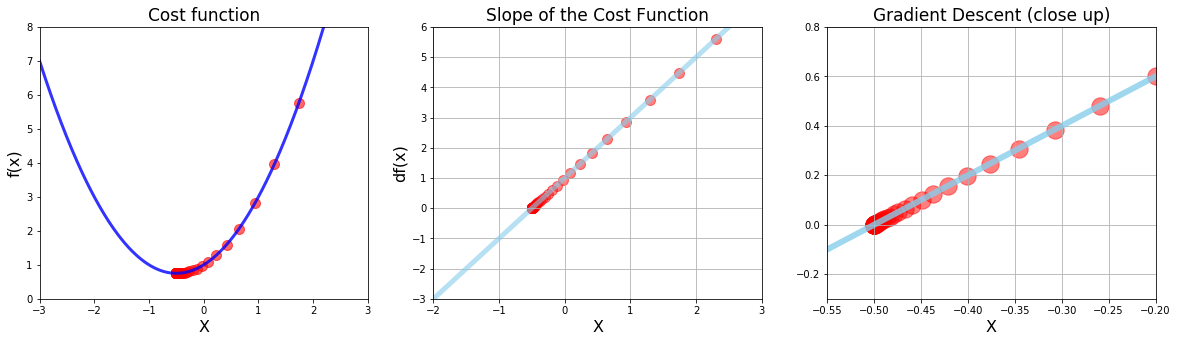

In [80]:
# Superimpose the gradient descent calculations on the plot:
plt.figure(figsize=[20,5])

# Chart 1: The Cost Function:
plt.subplot(1, 3, 1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# Chart 2: Derivative:
plt.subplot(1,3,2)

plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# Chart 3: Derivative (closeup):
plt.subplot(1,3,3)

plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.grid()
plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.5)

plt.show()

Python - Advanced Functions and the Pitfalls of Optimisation - Part 1:

# Example 2 - Multiple Minima vs. Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [81]:
# Make some data:
x_2 = np.linspace(-2, 2, 1000)

# Challenge: Write the g(x) function and the dg(x) function in Python:
def g(x):
    return x**4 - 4*x**2 + 5
    
def dg(x):
    return 4*x**3 - 8*x

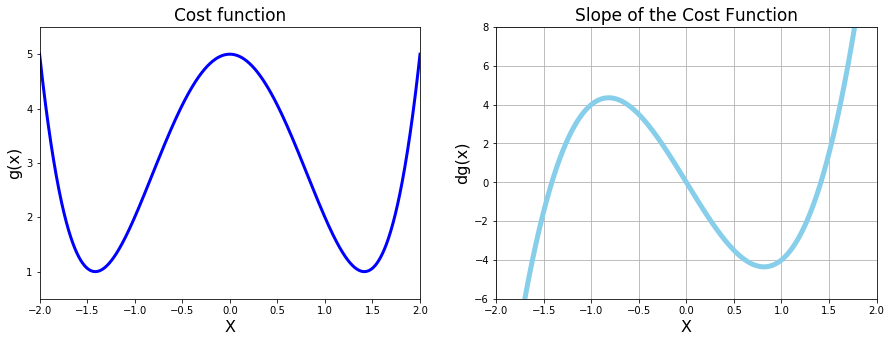

In [82]:
# Plot function and derivative side-by-side:
plt.figure(figsize=[15,5])

# Chart 1: The Cost Function:
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# Chart 2: Derivative:
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)


plt.show()

## Gradient Descent as a Python Function

In [83]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    # ctrl + ] - This moves selected sections to indented positions:
    
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size  = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break

    return new_x, x_list, slope_list

In [84]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [85]:
#cell above explained:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5, multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [86]:
#cell above but using default values in cell above:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


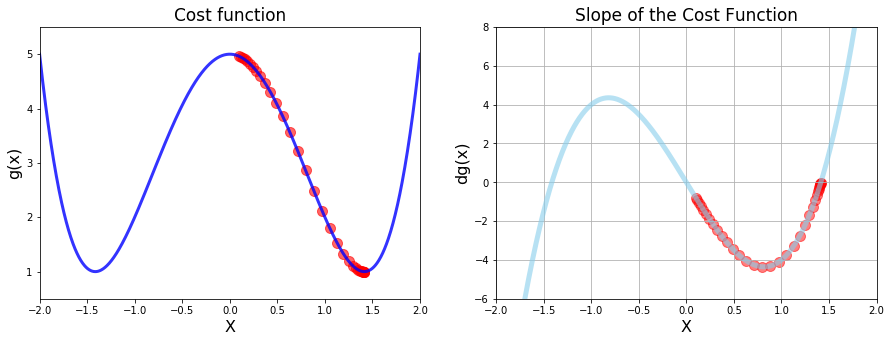

In [87]:
# Calling the gradient descent function:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0.1)

# Plot function, derivative and scatter plot side-by-side:
plt.figure(figsize=[15,5])

# Chart 1: The Cost Function:
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative:
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

Python - Tuples and the Pitfalls of Optimisation - Part2:

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 -2x^4 + 2$$

In [88]:
# Make data:
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

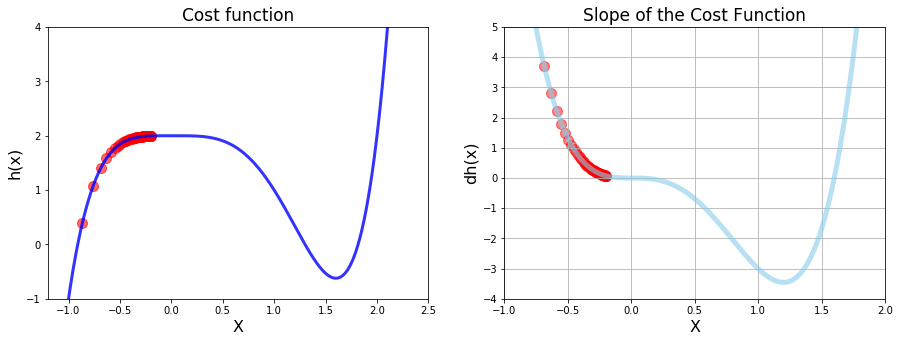

Local min occurs at :  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [89]:
# Calling the gradient descent function:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter=71)

# Plot function, derivative and scatter plot side-by-side:
plt.figure(figsize=[15,5])

# Chart 1: The Cost Function:
plt.subplot(1, 2, 1)

plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative:
plt.subplot(1,2,2)

plt.xlim(-1,2)
plt.ylim(-4,5)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at : ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [90]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [91]:
# Creating a tuple  - tuple packing:
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

print('I loooove', breakfast[1])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')
# + concatenation doesn't convert array items to strings - , does.

#List:
not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014
# Tuples are immutable - the following produces an error:
# breakfast[0] = 'sausage'
# as does:
# breakfast[3] = 'sausage'

tuple_with_single_value = 42,
print(tuple_with_single_value)
type(tuple_with_single_value)

#sequence unpacking:
main, side, greens = breakfast
print('Main course is', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

I loooove eggs
My hotel has no 4th floor
(42,)
Main course is bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


Understanding the learning rate:

# The Learning Rate:

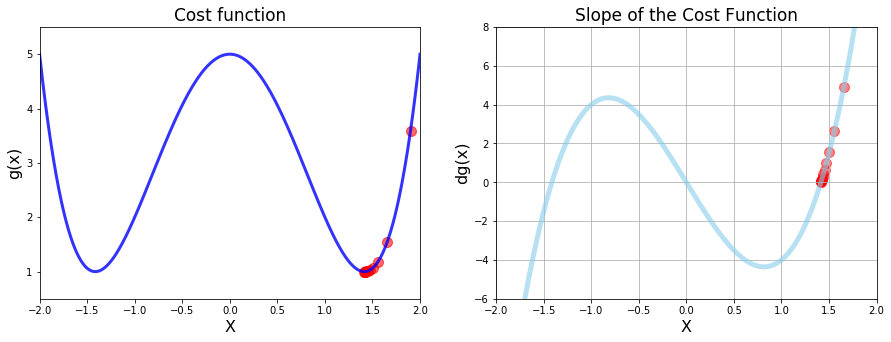

Number of steps is:  14


In [92]:
# Calling the gradient descent function:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9, multiplier=0.02, max_iter=500)

# Plot function, derivative and scatter plot side-by-side:
plt.figure(figsize=[15,5])

# Chart 1: The Cost Function:
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative:
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

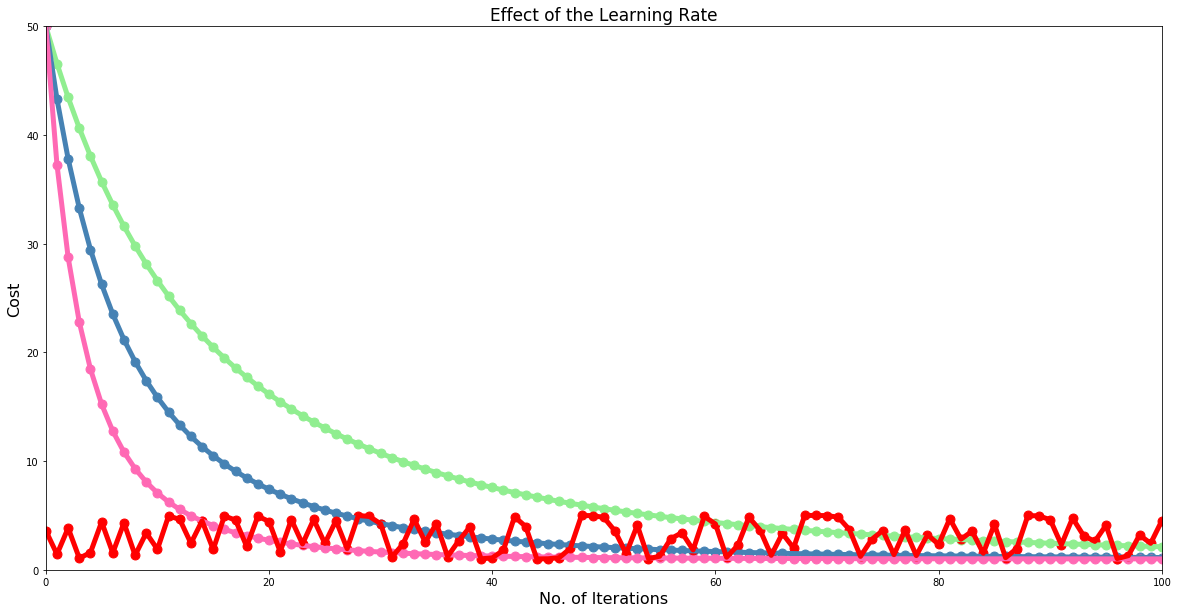

In [93]:
# Run Gradient Descent 3 times:
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, multiplier=0.0005, precision=0.0001, max_iter=n)

# Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma(0.002):
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, multiplier=0.002, precision=0.0001, max_iter=n)

# 'Insane' Gamma experiment:
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting reduction in cost for each iteration:
plt.figure(figsize=[20,10])

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of the Learning Rate', fontsize=17)
plt.xlabel('No. of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)
                             
# Values for our charts:
# 1) Y-Axis Data: convert the lists to numpy arrays:
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

insane_values = np.array(insane_gamma[1])
                             
# 2) X-Axis Data: create a list from 0 to n+1 (not manually!):
iteration_list = list(range(0, n+1))                             

# Plotting Low Learning Rate:
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting Mid Learning Rate:
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=80)

# Plotting High Learning Rate:
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=80)

# Plotting 'Insane' Experimental Learning Rate:
plt.plot(iteration_list, g(insane_values), color='red', linewidth=5)
plt.scatter(iteration_list, g(insane_values), color='red', s=80)

plt.show()                             

HOW TO CREATE 3D CHARTS:

# Example 4 - Data Visualisation with 3D Charts:

## Minimise: $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r +  1}$$ where $r$ is $3^{-x^2 - y^2}$

In [102]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [103]:
# Make our x and y data:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

type(x_4)

numpy.ndarray

In [104]:
# Using the shape attribute of ndarray:
print('Shape of X array', x_4.shape)

Shape of X array (200,)


In [105]:
# Return coordinate matrices from coordinate vectors:
x_4, y_4 = np.meshgrid(x_4, y_4)
# proof:
print('Array after meshgrid:', x_4.shape)

Array after meshgrid: (200, 200)


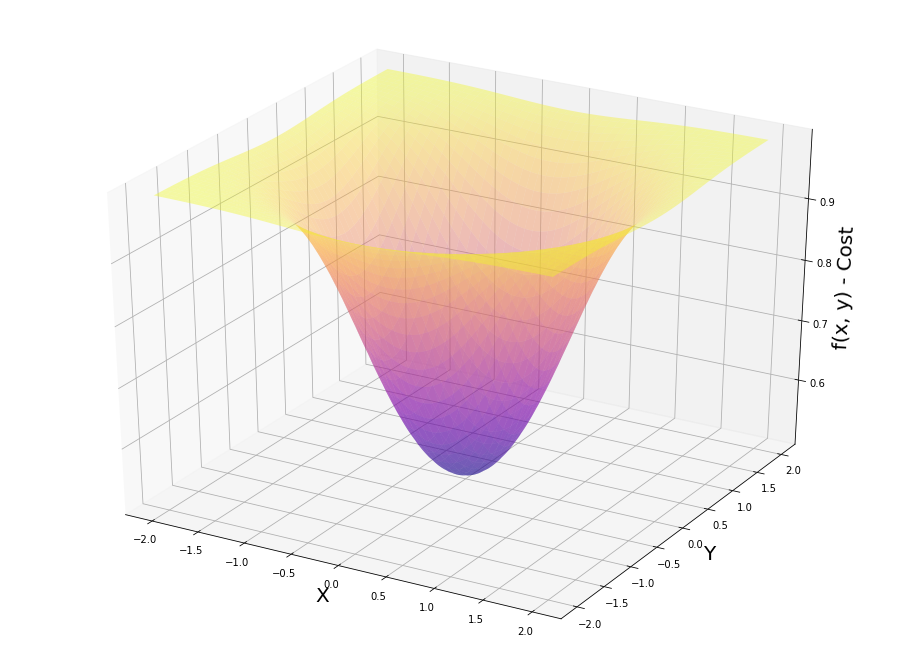

In [115]:
# Generating the 3D Plot:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.plasma, alpha=0.4)

plt.show()